<a href="https://colab.research.google.com/github/Harit0710/Machine-learning/blob/main/EDA_nd_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sufyan145/netflix-movies-and-shows-imdb-scores")

print("Path to dataset files:", path)

100%|██████████| 699k/699k [00:00<00:00, 56.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sufyan145/netflix-movies-and-shows-imdb-scores/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Netflix TV Shows and Movies.csv")
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [ ]:
df.shape

(5283, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [ ]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

# Display duplicate rows if any
duplicates = df[df.duplicated()]
print("\nDuplicate rows:")
print(duplicates)

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [index, id, title, type, description, release_year, age_certification, runtime, imdb_id, imdb_score, imdb_votes]
Index: []


In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

# Display duplicate rows if any
duplicates = df[df.duplicated()]
print("\nDuplicate rows:")
print(duplicates)

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [index, id, title, type, description, release_year, age_certification, runtime, imdb_id, imdb_score, imdb_votes]
Index: []


In [ ]:
# Check how many missing values are in each column
print(df.isnull().sum())


index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64


In [ ]:
# Check percentage of missing values per column
print("\nPercentage of missing values per column:")
print((df.isnull().sum() / len(df)) * 100)


Percentage of missing values per column:
index                 0.000000
id                    0.000000
title                 0.000000
type                  0.000000
description           0.094643
release_year          0.000000
age_certification    43.251940
runtime               0.000000
imdb_id               0.000000
imdb_score            0.000000
imdb_votes            0.302858
dtype: float64


In [ ]:
# Fill missing numerical values with mean
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

# Fill missing categorical values with mode (most frequent value)
df['age_certification'] = df['age_certification'].fillna(df['age_certification'].mode()[0])

# Fill missing text values with a placeholder
df['description'] = df['description'].fillna("No description available")

# Fill with median (recommended for votes since they can be skewed)
df['imdb_votes'] = df['imdb_votes'].fillna(df['imdb_votes'].median())



In [ ]:
# Check how many missing values are in each column again
print(df.isnull().sum())

index                0
id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64


In [ ]:
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

# Example: Check outliers in runtime
outliers_runtime, lower, upper = detect_outliers_iqr(df, 'runtime')
print(f"Outliers in runtime: {len(outliers_runtime)}")
print(f"Lower bound: {lower}, Upper bound: {upper}")


Outliers in runtime: 8
Lower bound: -46.5, Upper bound: 197.5


In [ ]:
df['runtime'] = np.where(df['runtime'] > upper, upper, # treat the outliers
                np.where(df['runtime'] < lower, lower, df['runtime']))


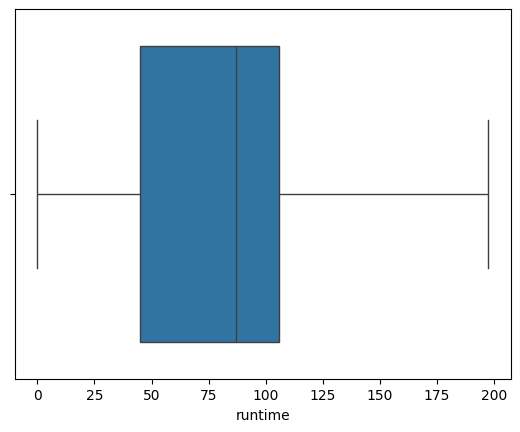

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['runtime'])
plt.show()

In [ ]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns:", num_cols.tolist())


Numerical columns: ['index', 'release_year', 'runtime', 'imdb_score', 'imdb_votes']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

df_scaled.head()


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,-1.731723,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,-5.429246,R,0.871907,tt0075314,1.521813,8.871991
1,-1.731067,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",-5.565385,PG,0.304938,tt0071853,1.435667,5.833604
2,-1.730412,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",-5.020827,R,0.382252,tt0079470,1.263375,4.242165
3,-1.729756,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,-5.837664,R,1.387332,tt0070047,1.349521,4.236682
4,-1.729100,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,-6.382223,TV-14,-1.267110,tt0063929,1.952542,0.569549


In [ ]:
print("Before scaling:")
print(df[num_cols].describe())

print("\nAfter scaling (StandardScaler):")
print(df_scaled[num_cols].describe())


Before scaling:
             index  release_year      runtime   imdb_score    imdb_votes
count  5283.000000   5283.000000  5283.000000  5283.000000  5.283000e+03
mean   2641.000000   2015.879992    79.167518     6.533447  2.334321e+04
std    1525.215067      7.346098    38.806549     1.160932  8.700999e+04
min       0.000000   1953.000000     0.000000     1.500000  5.000000e+00
25%    1320.500000   2015.000000    45.000000     5.800000  5.220000e+02
50%    2641.000000   2018.000000    87.000000     6.600000  2.279000e+03
75%    3961.500000   2020.000000   106.000000     7.400000  1.009700e+04
max    5282.000000   2022.000000   197.500000     9.600000  2.268288e+06

After scaling (StandardScaler):
              index  release_year       runtime    imdb_score   imdb_votes
count  5.283000e+03  5.283000e+03  5.283000e+03  5.283000e+03  5283.000000
mean  -8.607748e-17 -1.299770e-14  1.344961e-16  8.284958e-16     0.000000
std    1.000095e+00  1.000095e+00  1.000095e+00  1.000095e+00     1.0

In [ ]:
# Select only categorical (object/string) columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())


Categorical columns: ['id', 'title', 'type', 'description', 'age_certification', 'imdb_id']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy original dataset
df_encoded = df.copy()

# 1) Detect categorical columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns

# 2) Loop through each categorical column
for col in cat_cols:
    unique_vals = df_encoded[col].nunique()

    # If only 2 unique values -> Label Encoding (safe for binary)
    if unique_vals == 2:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    # If moderate number of categories (<=10) -> One-Hot Encoding
    elif unique_vals <= 10:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)

    # If too many categories (>10) -> Frequency Encoding
    else:
        freq_map = df_encoded[col].value_counts().to_dict()
        df_encoded[col] = df_encoded[col].map(freq_map)

# ✅ Now df_encoded has all categorical columns encoded
print(df_encoded.head())


   index  id  title  type  description  release_year  age_certification  \
0      0   1      2     0            1          1976                548   
1      1   1      1     0            1          1975                238   
2      2   1      1     0            1          1979                548   
3      3   1      1     0            1          1973                548   
4      4   1      1     1            1          1969                436   

   runtime  imdb_id  imdb_score  imdb_votes  
0    113.0        1         8.3    795222.0  
1     91.0        1         8.2    530877.0  
2     94.0        1         8.0    392419.0  
3    133.0        1         8.1    391942.0  
4     30.0        1         8.8     72895.0  


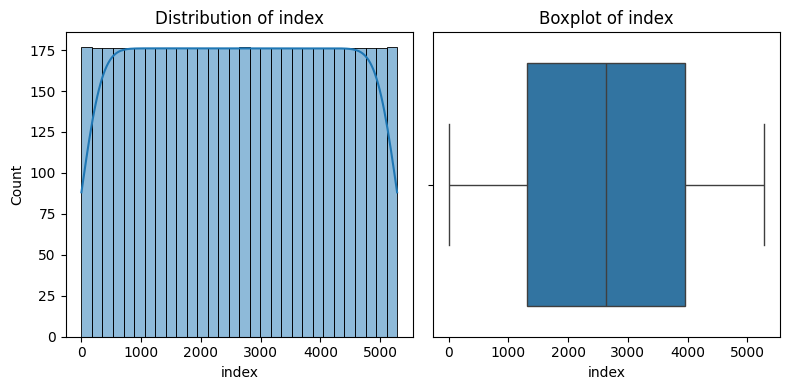

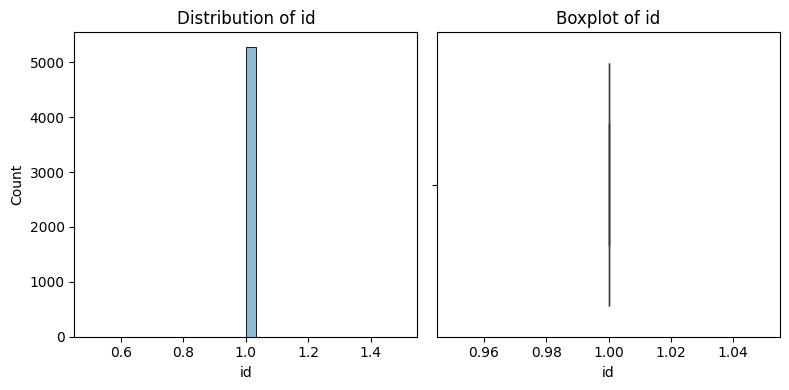

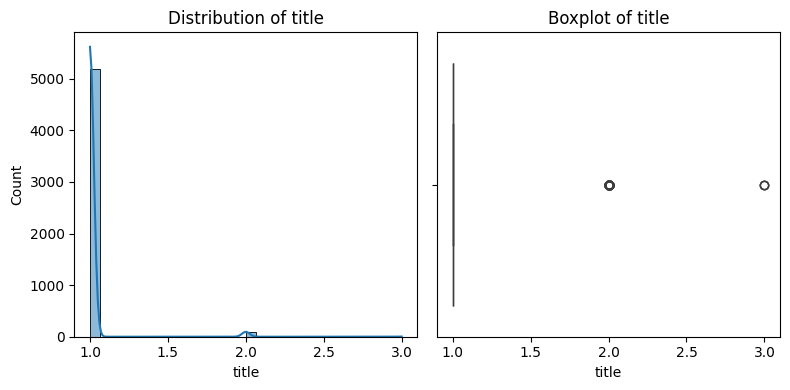

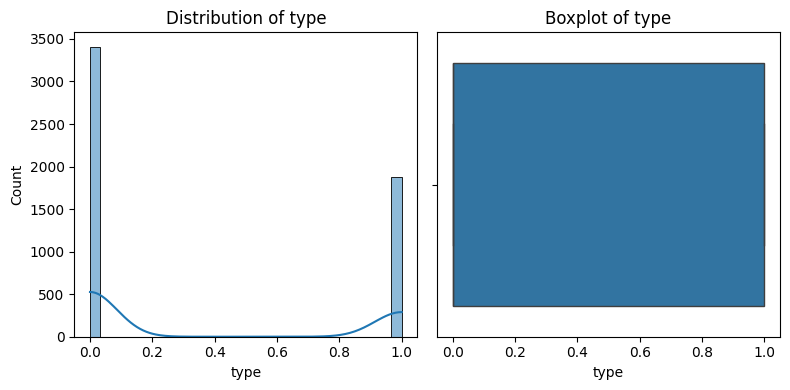

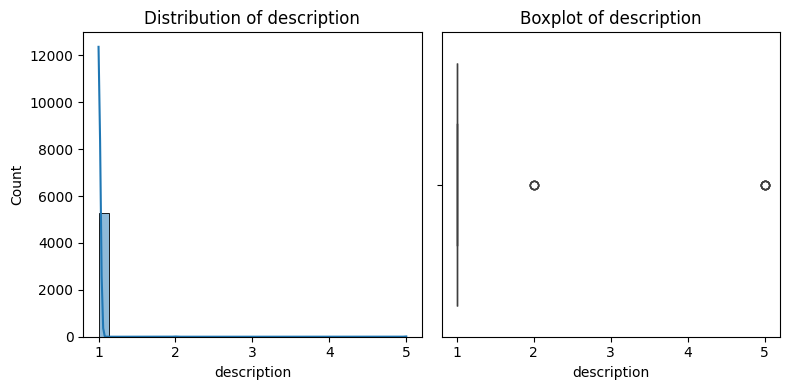

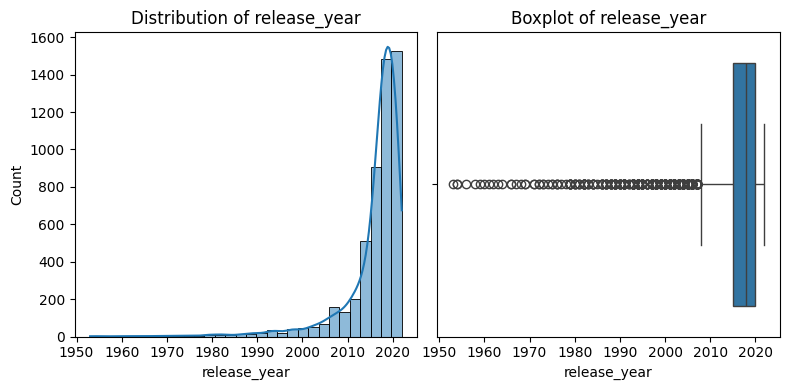

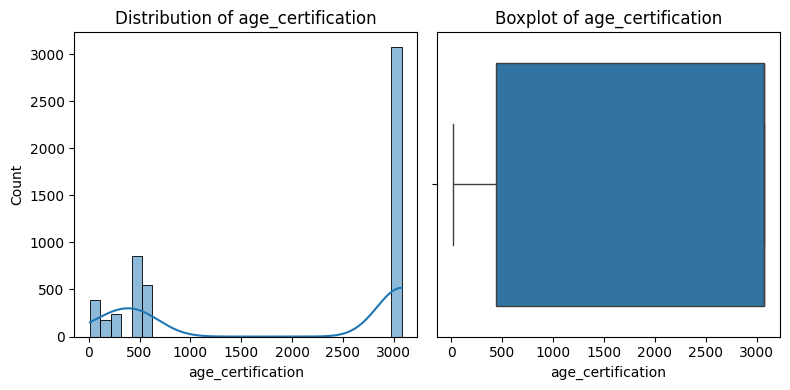

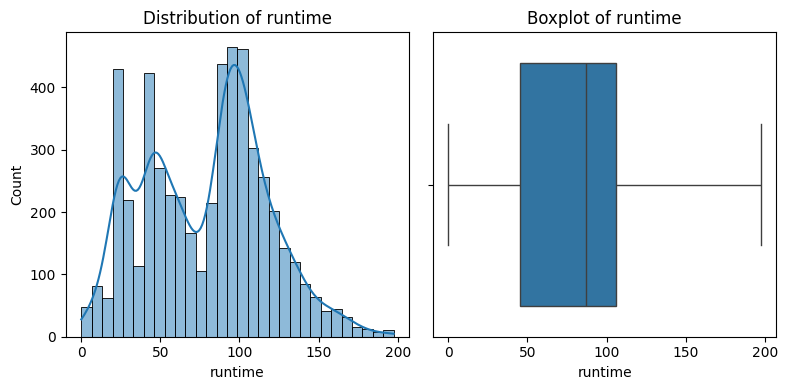

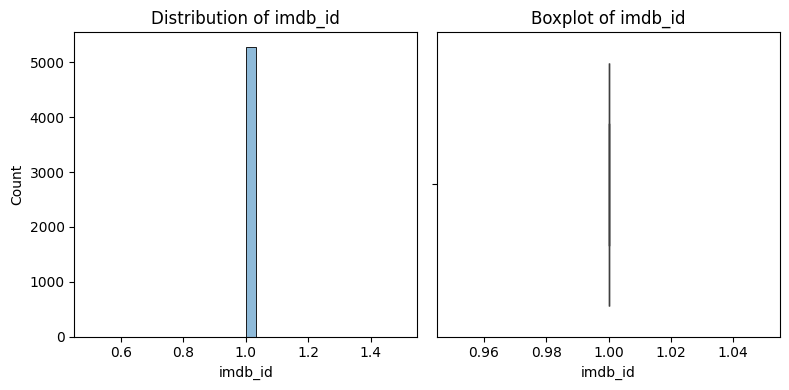

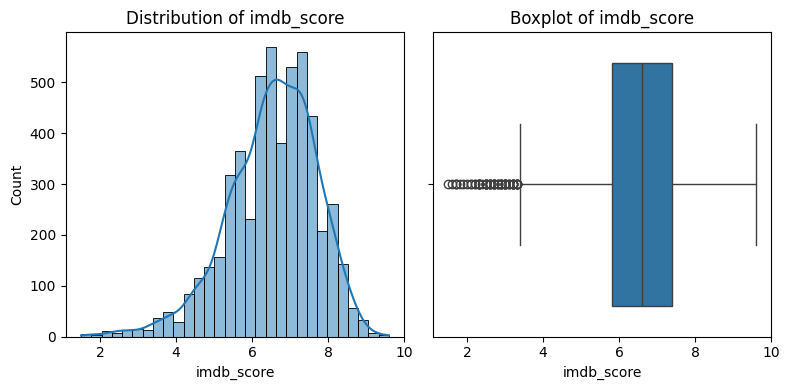

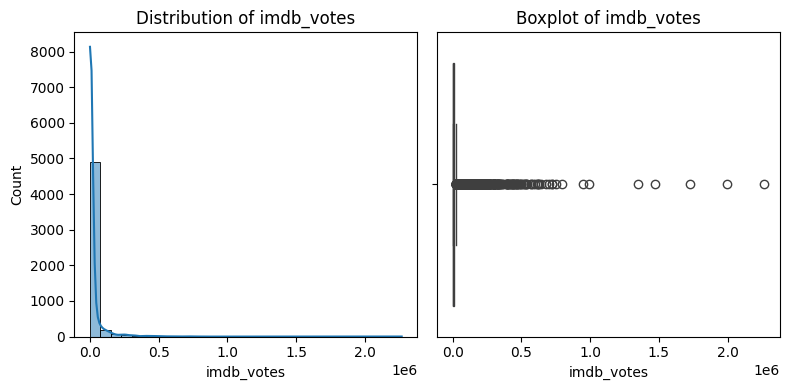

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through columns
for col in df_encoded.columns:
    plt.figure(figsize=(8,4))

    # Numerical columns → histogram + boxplot
    if pd.api.types.is_numeric_dtype(df_encoded[col]):
        plt.subplot(1,2,1)
        sns.histplot(df_encoded[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")

        plt.subplot(1,2,2)
        sns.boxplot(x=df_encoded[col])
        plt.title(f"Boxplot of {col}")

    # Categorical columns → countplot
    else:
        sns.countplot(y=df_encoded[col], order=df_encoded[col].value_counts().index)
        plt.title(f"Countplot of {col}")

    plt.tight_layout()
    plt.show()


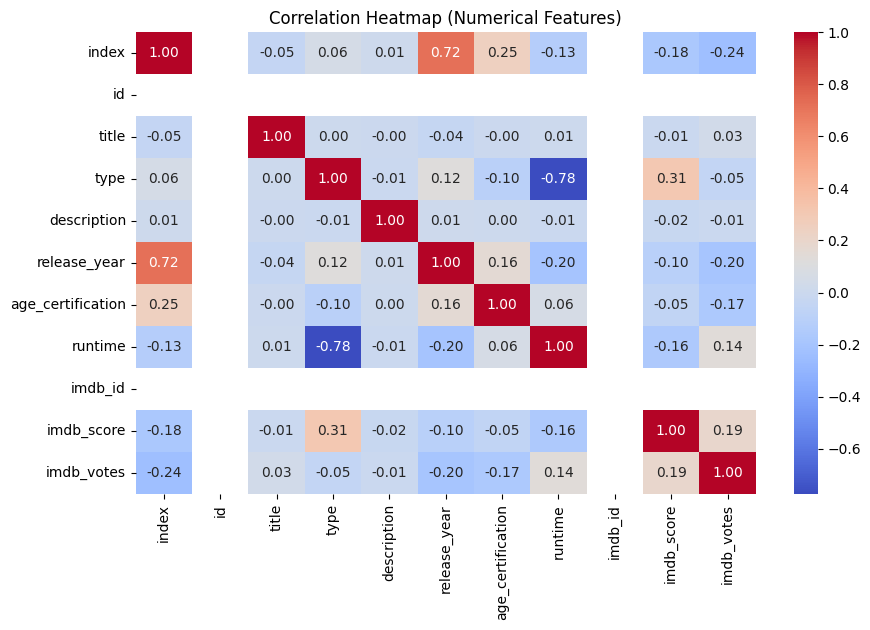

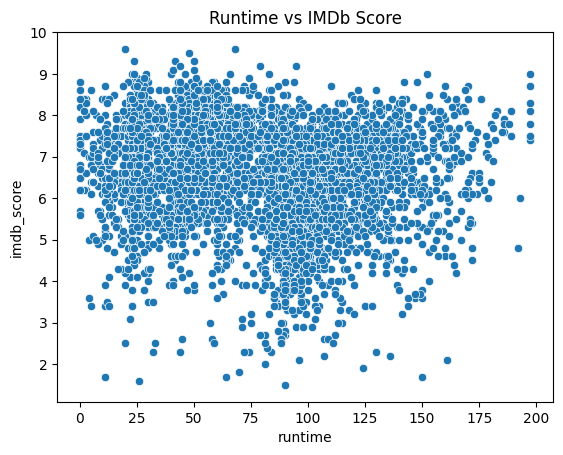

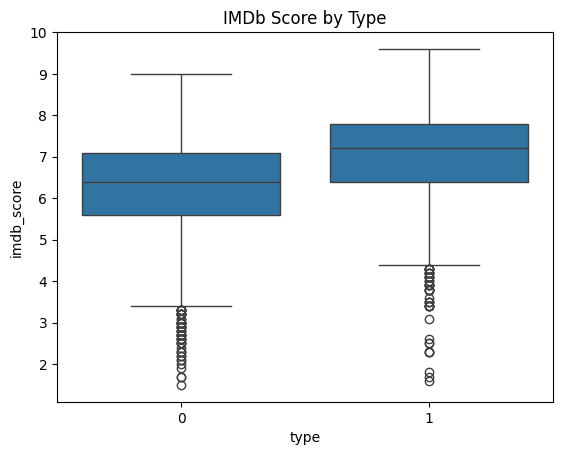

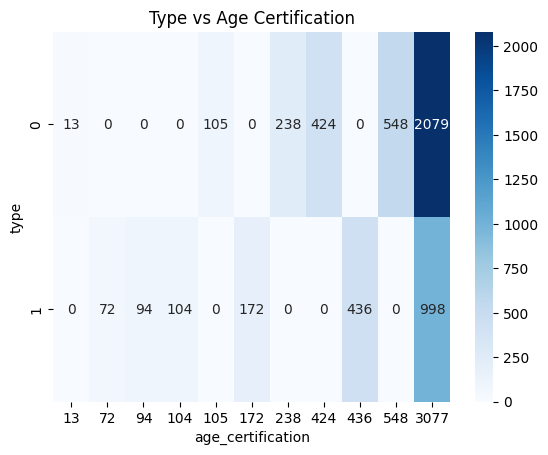

In [ ]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Example: numerical vs numerical (scatter)
sns.scatterplot(data=df_encoded, x="runtime", y="imdb_score")
plt.title("Runtime vs IMDb Score")
plt.show()

# Example: categorical vs numerical (boxplot)
sns.boxplot(data=df_encoded, x="type", y="imdb_score")
plt.title("IMDb Score by Type")
plt.show()

# Example: categorical vs categorical (heatmap)
ct = pd.crosstab(df_encoded['type'], df_encoded['age_certification'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Type vs Age Certification")
plt.show()


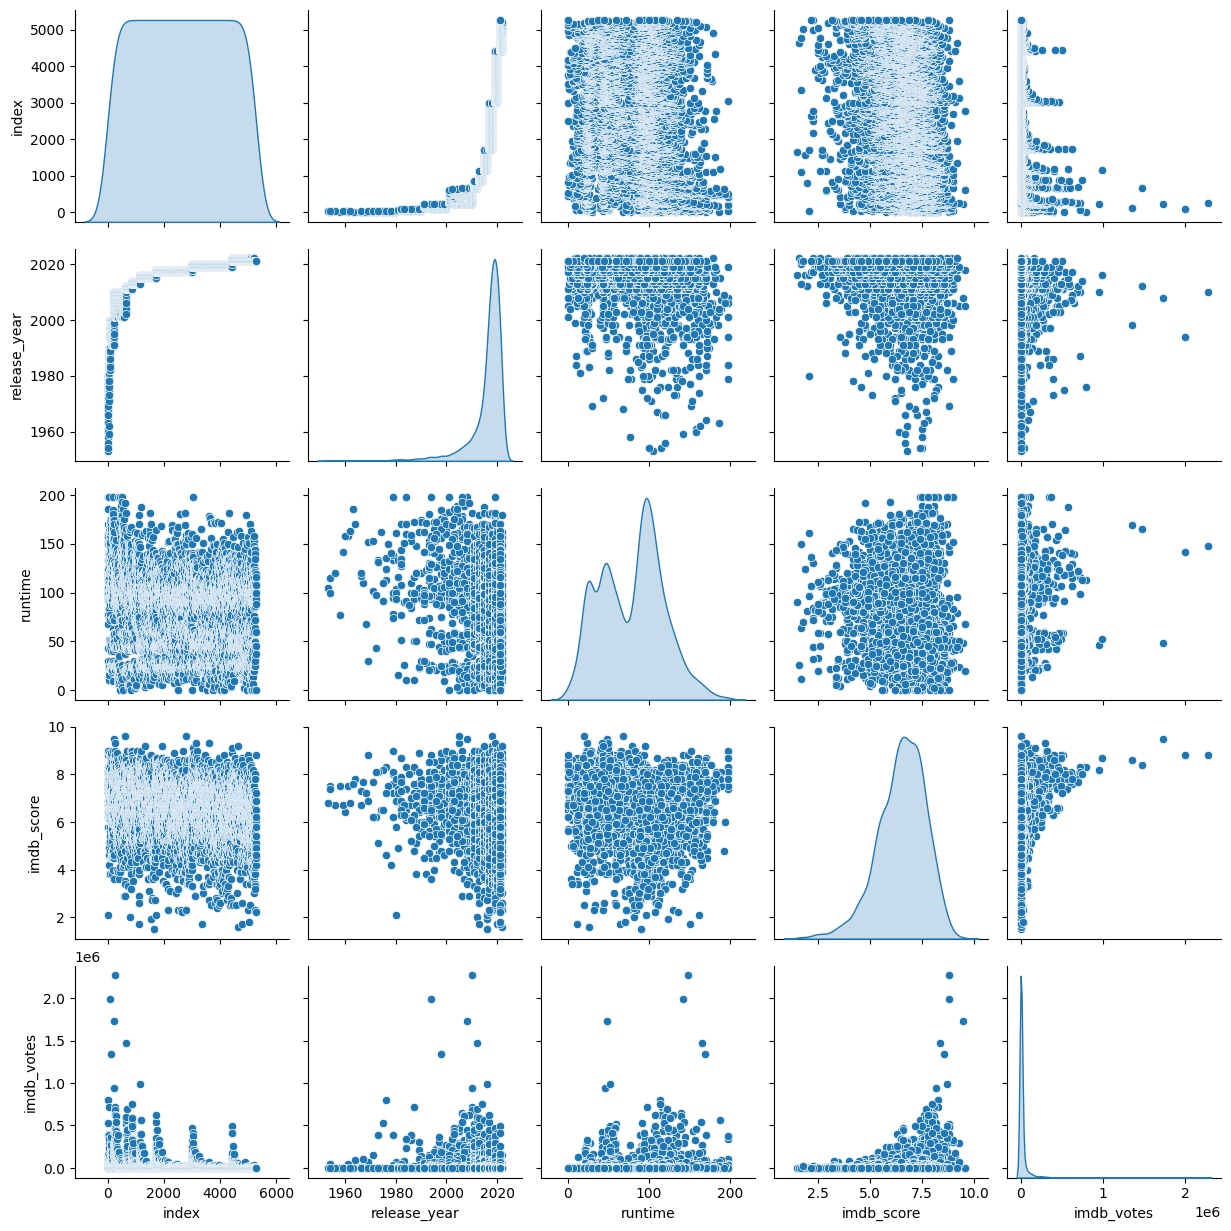

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot
sns.pairplot(df[num_cols], diag_kind="kde")
plt.show()


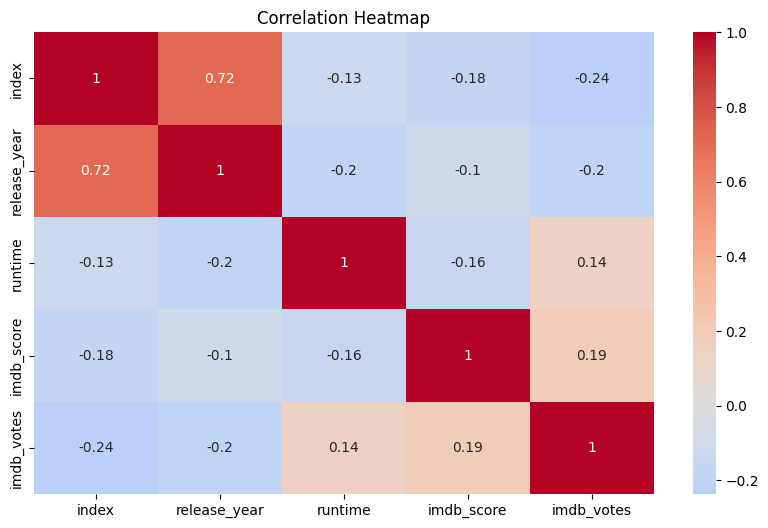

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


# Key Insights:

📌 Release year is skewed toward recent years (most titles are after 2010).

📌 Runtime varies a lot, with some extreme long shows, but most are clustered around typical movie lengths.

📌 IMDb votes are highly skewed (a few very popular titles dominate).

📌 IMDb score doesn’t vary much (most are 6–8).

📌 Type (Movie vs TV Show): Movies are more frequent, but TV shows have grown recently.

📌 Correlations: imdb_votes and imdb_score show some relationship (popular titles usually score higher).

# Linear Regression :

To predict IMBD scores using different features as input variables

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['release_year', 'runtime', 'imdb_votes']]  # predictors
y = df['imdb_score']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.07802797190715116
RMSE: 1.1457937406206686


In [ ]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df)


        Feature  Coefficient
0  release_year    -0.017379
1       runtime    -0.006134
2    imdb_votes     0.000003


# Final Evaluation

R² Score = 0.078
→ R² ranges from 0 to 1 (sometimes negative if the model is really bad).

0.078 means model explains only ~7.8% of the variance in IMDb scores.

That’s very low — the features (release_year, runtime, imdb_votes, etc.) don’t predict IMDb scores well.

RMSE = 1.14
→ IMDb scores usually range from 1 to 10.

An error of ~1.1 means predictions are often off by more than 1 point.

That’s not terrible, but not great either.

SO , no ...we can't deploy the model !!!
